In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline

In [2]:
txt="""
1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.
"""
Atr=txt.split('\n')
Atr

['',
 '1. If one of us apologizes when our discussion deteriorates, the discussion ends.',
 '2. I know we can ignore our differences, even if things get hard sometimes.',
 '3. When we need it, we can take our discussions with my spouse from the beginning and correct it.',
 '4. When I discuss with my spouse, to contact him will eventually work.',
 '5. The time I spent with my wife is special for us.',
 "6. We don't have time at home as partners.",
 '7. We are like two strangers who share the same environment at home rather than family.',
 '8. I enjoy our holidays with my wife.',
 '9. I enjoy traveling with my wife.',
 '10. Most of our goals are common to my spouse.',
 '11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.',
 '12. My spouse and I have similar values in terms of personal freedom.',
 '13. My spouse and I have similar sense of entertainment.',
 '14. Most of our goals for people (children, friends, etc.) ar

In [3]:
df=pd.read_csv('divorce.csv',';')
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [4]:
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


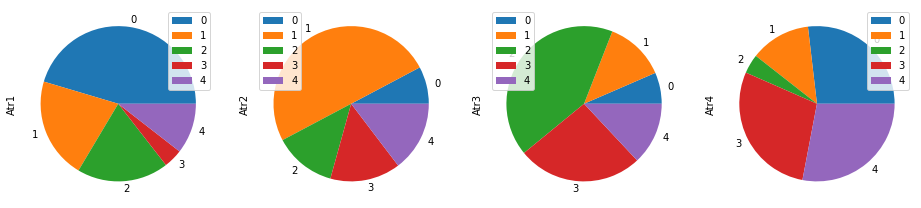

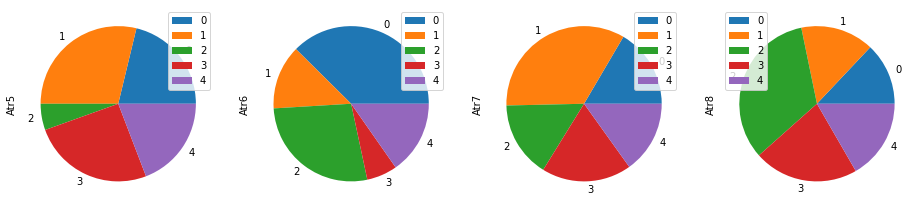

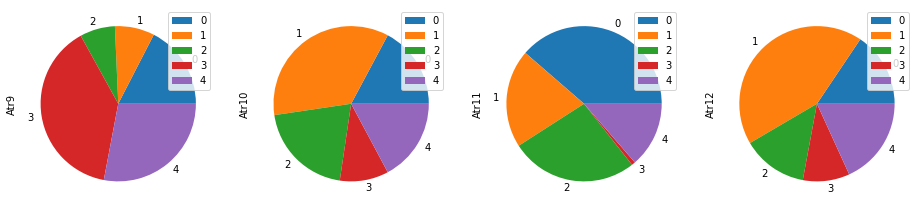

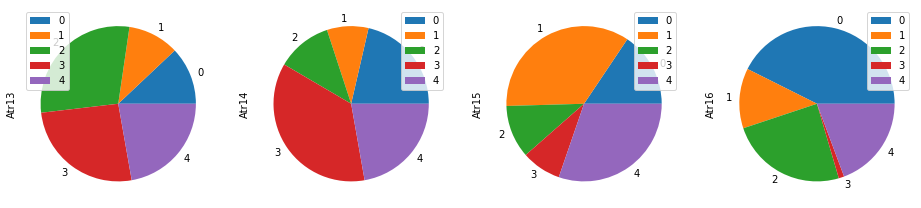

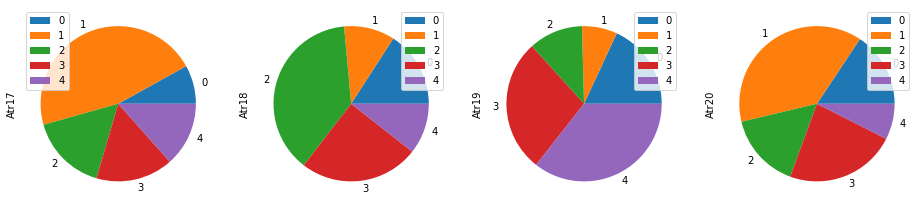

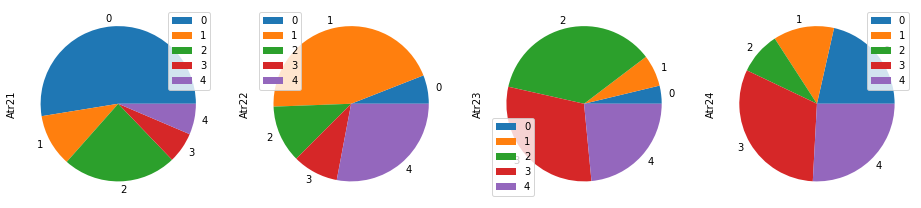

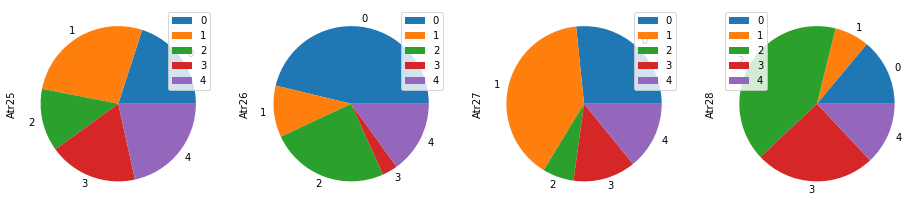

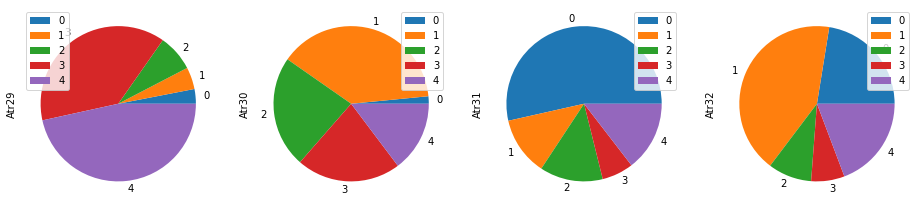

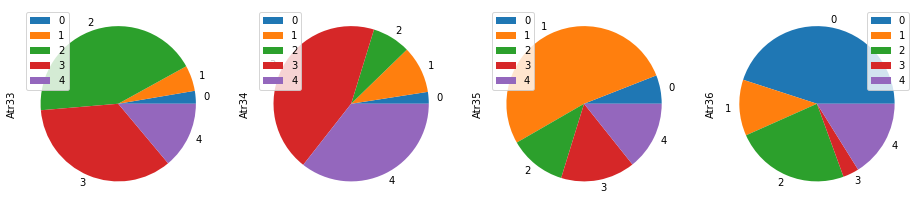

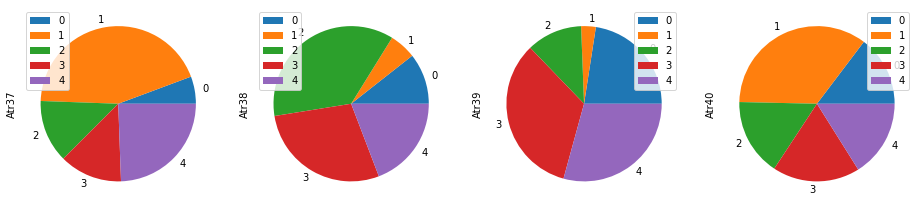

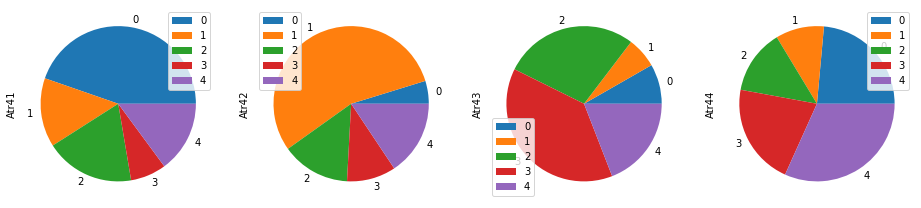

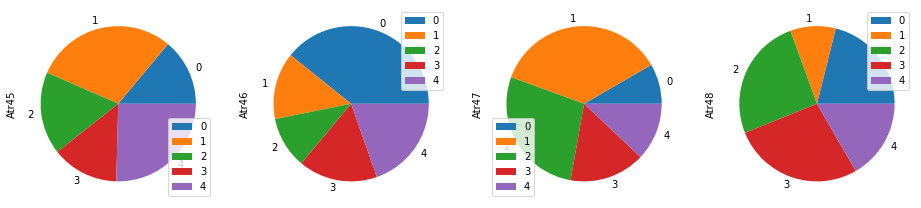

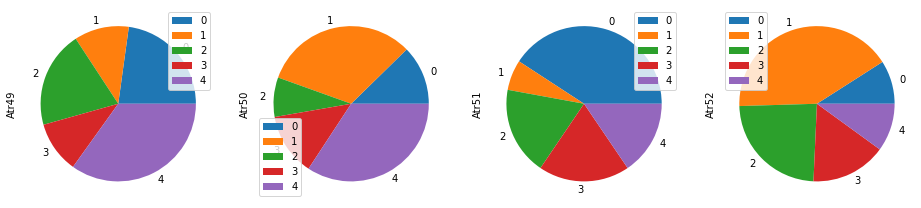

In [5]:
num=[]
for i in range(1,55,1):
    for j in range(5):
        num.append(df['Atr'+str(i)][df['Atr'+str(i)]==j].count())
mat=np.array(num).reshape(5,54)
response_num=pd.DataFrame(mat)
response_num.columns=['Atr'+str(i+1) for i in range(54)]
for i in range(13):
    response_num[['Atr'+str(4*i+1),'Atr'+str(4*i+2),'Atr'+str(4*i+3),'Atr'+str(4*i+4)]].plot(kind='pie',subplots=True, figsize=(16, 8))

In [6]:
df.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


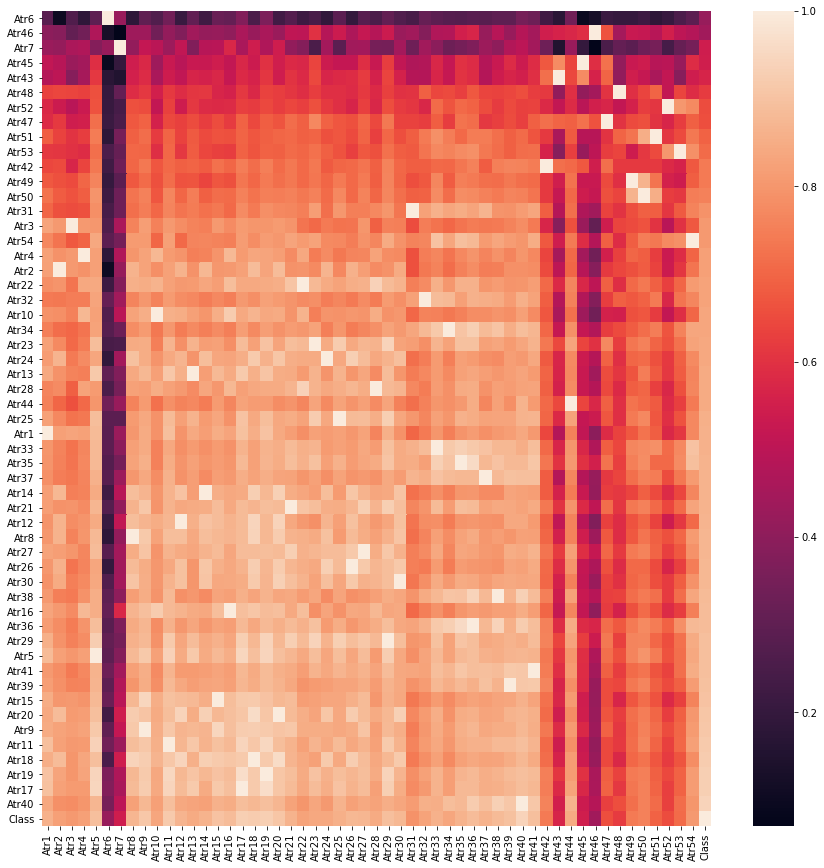

In [7]:
plt.figure(figsize=(15,15))
sn.heatmap(df.corr().sort_values('Class'))

In [8]:
df[['Atr40','Atr17','Class']].head()

,Atr40,Atr17,Class
0,3,0,1
1,4,4,1
2,3,3,1
3,4,3,1
4,1,1,1


In [9]:
df[['Atr40','Atr17','Class']].tail()

,Atr40,Atr17,Class
165,0,0,0
166,1,0,0
167,2,0,0
168,1,0,0
169,0,0,0


In [10]:
Atr[17]

'17. We share the same views about being happy in our life with my spouse'

In [11]:
df[['Atr40','Atr17','Class']].corr()

,Atr40,Atr17,Class
Atr40,1.000000,0.888402,0.938684
Atr17,0.888402,1.000000,0.929346
Class,0.938684,0.929346,1.000000


[Text(0, 0.5, 'Same opinion about being happy'),
 Text(0.5, 0, 'Starting discussion')]

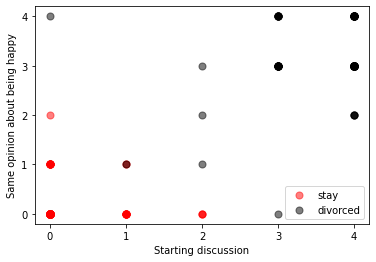

In [12]:
ax=df[df.Class==0].plot(kind='scatter',x='Atr40',y='Atr17',color='red',label='stay',s=50,alpha=0.5)
plt.xticks([0,1,2,3,4,5])
plt.yticks([0,1,2,3,4,5])
df[df.Class==1].plot(kind='scatter',x='Atr40',y='Atr17',color='black',label='divorced',ax=ax,alpha=0.5,s=50)
ax.set(xlabel='Starting discussion',ylabel='Same opinion about being happy')

In [13]:
pd.set_option('display.max_columns',None)
df[(df['Atr17']==0) & (df['Class']==1)]

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1


In [54]:
X=df.values
X[0:5]

array([[2, 2, 4, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 3, 3, 2, 1, 1, 2,
        3, 2, 1, 3, 3, 3, 2, 3, 2, 1, 1],
       [4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 3, 4, 0, 4, 4, 4, 4, 3, 2, 1, 1,
        0, 2, 2, 1, 2, 0, 1, 1, 0, 4, 2, 3, 0, 2, 3, 4, 2, 4, 2, 2, 3, 4,
        2, 2, 2, 3, 4, 4, 4, 4, 2, 2, 1],
       [2, 2, 2, 2, 1, 3, 2, 1, 1, 2, 3, 4, 2, 3, 3, 3, 3, 3, 3, 2, 1, 0,
        1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3,
        2, 3, 2, 3, 1, 1, 1, 2, 2, 2, 1],
       [3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 3, 2, 3, 2, 2, 1, 1, 3, 3, 4, 4, 2, 2, 3, 2,
        3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1],
       [2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0,
        0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 3, 0,
        2, 2, 1, 2, 3, 2, 2, 2, 1, 0, 1]], dtype=int64)

In [15]:
y=df[['Class']].values.ravel()
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (119, 6) (119,)
Test set: (51, 6) (51,)


In [17]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [18]:
cll = svm.SVC(kernel='linear')
cll.fit(X_train, y_train) 

SVC(kernel='linear')

In [19]:
X_test[0:5]

array([[4, 3, 3, 4, 3, 3],
       [4, 3, 3, 3, 3, 3],
       [4, 3, 3, 4, 3, 3],
       [4, 3, 3, 3, 3, 3],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [20]:
y_test[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [21]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [22]:
yhatl = cll.predict(X_test)
yhatl [0:5]

array([1, 1, 1, 1, 0], dtype=int64)

# Prediction Using SVM

In [23]:
for i in (Atr[40],Atr[17],Atr[19],Atr[18],Atr[11],Atr[9]):
    print(i)

40. We're just starting a discussion before I know what's going on.
17. We share the same views about being happy in our life with my spouse
19. My spouse and I have similar ideas about how roles should be in marriage
18. My spouse and I have similar ideas about how marriage should be
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
9. I enjoy traveling with my wife.


In [24]:
xx=[0,0,0,0,0,0]  #masukin angka sesuai pertanyaan (0=sangat setuju, 4=sangat tidak setuju)
print('tetap') if clf.predict([xx])==0 else cerai

tetap


# ----------------------------------------------------------------------------------------------------------

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        24

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

Confusion matrix, without normalization
[[27  0]
 [ 0 24]]


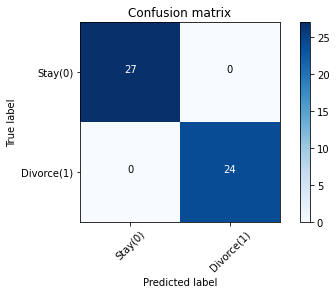

In [27]:
cnf_matrix = confusion_matrix(y_test, yhatl, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatl))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Stay(0)','Divorce(1)'],normalize= False,  title='Confusion matrix')

In [28]:
from sklearn.metrics import f1_score
from sklearn import metrics
f1_score(y_test, yhatl, average='weighted') 

1.0

In [29]:
metrics.accuracy_score(y_test, yhat)

0.9803921568627451

In [55]:
print("{:20}{:20}".format("rbf solver (avg)","linear solver (avg)"))
rbf=[]
lin=[]
for i in range(42):    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=i)
    clf.fit(X_train, y_train) 
    cll.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    yhatl = cll.predict(X_test)
    #print("{:<20.3f}{:<20.3f}".format(f1_score(y_test, yhat, average='weighted'),f1_score(y_test, yhatl, average='weighted')))
    rbf.append(f1_score(y_test, yhat, average='weighted'))
    lin.append(f1_score(y_test, yhatl, average='weighted'))
print(sum(rbf)/42," ",sum(lin)/42)

rbf solver (avg)    linear solver (avg) 
0.978181552832648   0.9831207652130184


In [31]:
from sklearn import preprocessing
Xp = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[3, 0, 0, 0, 1, 0],
       [4, 4, 3, 4, 4, 4],
       [3, 3, 3, 3, 3, 1],
       [4, 3, 3, 3, 4, 3],
       [1, 1, 2, 1, 0, 0]], dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split( Xp, y, test_size=0.2, random_state=42)
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

Train set: (136, 6) (136,)
Test set: (34, 6) (34,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train2,y_train2)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [34]:
LRl = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train2,y_train2)
LRl

LogisticRegression(C=0.01)

In [35]:
LRn = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train2,y_train2)
LRn

LogisticRegression(C=0.01, solver='newton-cg')

In [36]:
yhat2 = LR.predict(X_test2)
yhat2

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [37]:
yhat2l = LRl.predict(X_test2)
yhat2l

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [38]:
yhat2n = LRn.predict(X_test2)
yhat2n

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [39]:
for i in (Atr[40],Atr[17],Atr[19],Atr[18],Atr[11],Atr[9]):
    print(i)

40. We're just starting a discussion before I know what's going on.
17. We share the same views about being happy in our life with my spouse
19. My spouse and I have similar ideas about how roles should be in marriage
18. My spouse and I have similar ideas about how marriage should be
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
9. I enjoy traveling with my wife.


# Prediction using LogReg

In [40]:
Xn=X
Xn[0]=[1,1,1,1,1,1] #masukin angka sesuai pertanyaan (0=sangat setuju, 4=Sangat tidak setuju)
Xt=preprocessing.StandardScaler().fit(Xn).transform(Xn)
print(round(LR.predict_proba(Xt)[0][0]*100),'%') #kemungkinan untuk bertahan, >50% berarti bertahan

64 %


# ------------------------------------------------------------------------------------

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test2, yhat2, labels=[0,1]))

[[14  0]
 [ 0 20]]


In [42]:
X_test2

array([[-1.04, -1.03, -1.  , -0.97, -0.42, -0.94],
       [ 1.19,  0.84,  0.83,  1.59,  0.8 ,  0.99],
       [-1.04, -1.03, -1.  , -0.97, -1.03, -0.94],
       [ 1.19,  1.46,  1.44,  0.95,  1.41,  0.99],
       [-1.04, -1.03,  0.22, -0.97, -1.03, -0.94],
       [-1.04, -0.41, -1.  , -0.97, -0.42, -0.94],
       [-0.49, -1.03, -1.  , -0.97, -1.03, -0.94],
       [ 1.19,  0.84,  0.83,  0.95,  0.8 ,  0.99],
       [-1.04, -1.03, -1.  , -0.97, -1.03, -0.94],
       [ 1.19,  0.84,  0.83,  0.31,  0.8 ,  0.99],
       [ 1.19,  1.46,  1.44,  1.59,  1.41,  0.99],
       [-0.49, -1.03, -1.  , -0.97, -0.42, -0.94],
       [-1.04, -1.03, -1.  , -0.97, -1.03, -0.94],
       [ 1.19,  0.84,  0.83,  0.95,  0.8 ,  0.35],
       [ 0.63,  0.84,  0.83,  0.95,  0.8 ,  0.99],
       [-1.04, -1.03, -1.  , -0.97, -1.03, -0.94],
       [ 1.19,  1.46,  1.44,  0.31,  1.41,  0.99],
       [-1.04, -1.03, -1.  , -0.97, -1.03, -0.94],
       [ 1.19,  1.46,  1.44,  1.59,  0.8 ,  1.64],
       [-1.04, -0.41, -1.  , -0

In [43]:
y_test2

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [44]:
yhat2

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

Confusion matrix, without normalization
[[14  0]
 [ 0 20]]


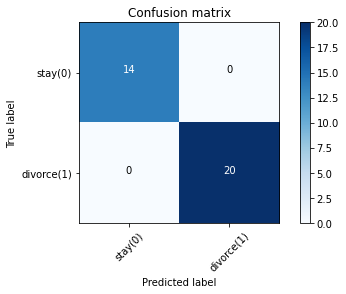

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test2, yhat2, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['stay(0)','divorce(1)'],normalize= False,  title='Confusion matrix')

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test2, yhat2, average='weighted') 

1.0

In [47]:
metrics.accuracy_score(y_test2, yhat2)

1.0

In [56]:
lbf=[]
new=[]
lin=[]
sag=[]
print("{:<20}{:<20}{:<20}{:<20}".format("lbfgs","newton-cg",'liblinear','sag'))
for i in range(42):
    Xp = preprocessing.StandardScaler().fit(X).transform(X)
    X_train2, X_test2, y_train2, y_test2 = train_test_split( Xp, y, test_size=0.2, random_state=i)
    LRl = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train2,y_train2)
    LRn = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train2,y_train2)
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train2,y_train2)
    LRs = LogisticRegression(C=0.01, solver='sag').fit(X_train2,y_train2)
    yhatn = LRn.predict(X_test2)
    yhat2 = LR.predict(X_test2)
    yhatl = LRl.predict(X_test2)
    yhats = LRs.predict(X_test2)
    
#      print("{:<20.3f}{:<20.3f}{:<20.3f}{:<20.3f}".format(f1_score(y_test2, yhatl, average='weighted')
#                                                         ,f1_score(y_test2, yhatn, average='weighted')
#                                                        ,f1_score(y_test2, yhat2, average='weighted')
#                                                        ,f1_score(y_test2, yhats, average='weighted')))
    new.append(f1_score(y_test2, yhatn, average='weighted'))
    lin.append(f1_score(y_test2, yhat2, average='weighted'))
    sag.append(f1_score(y_test2, yhats, average='weighted'))
    lbf.append(f1_score(y_test2, yhatl, average='weighted'))
print(sum(lbf)/42," ",sum(new)/42," ",sum(lin)/42," ",sum(sag)/42)

lbfgs               newton-cg           liblinear           sag                 
0.9795771983024748   0.9795771983024748   0.9795771983024748   0.9795771983024748


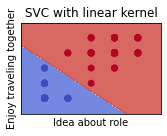

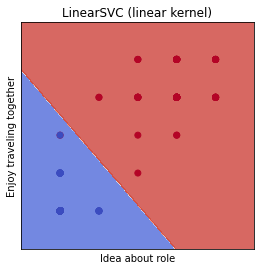

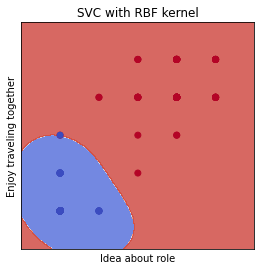

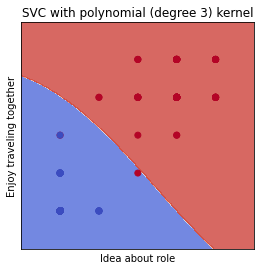

<Figure size 720x720 with 0 Axes>

In [49]:
X=df[['Atr9','Atr19']].values
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Idea about role')
    plt.ylabel('Enjoy traveling together')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.figure(figsize=(10,10))
plt.show()

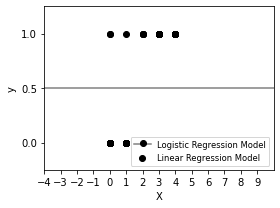

In [50]:
from sklearn import linear_model
from scipy.special import expit
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.T[1], y, color='black', zorder=20)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

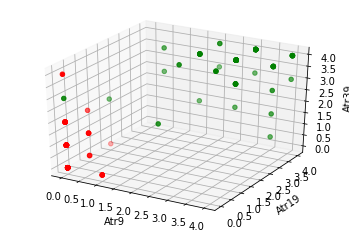

In [51]:
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "g")
X=df[['Atr9','Atr19','Atr39']].values
k=map(lambda x:colours[x], y)
Y=list(k)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set(xlabel='Atr9',ylabel='Atr19',zlabel='Atr39')
ax.scatter(X.T[0], X.T[1], X.T[2], c=Y)

In [52]:
X.T[0]

array([0, 4, 1, 3, 0, 0, 2, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3,
       4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3,
       2, 2, 3, 4, 3, 3, 3, 4, 3, 4, 2, 3, 2, 1, 4, 4, 4, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
Atr[39]

'39. Our discussions often occur suddenly.'